In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'font.size': 18})

In [2]:
data = pd.read_csv('data/train.csv', index_col= 'id')
data.head(3)

,epoch,sat_id,x,y,z,Vx,Vy,Vz,x_sim,y_sim,z_sim,Vx_sim,Vy_sim,Vz_sim
id,,,,,,,,,,,,,,
0,2014-01-01T00:00:00.000,0,-8855.823863,13117.780146,-20728.353233,-0.908303,-3.808436,-2.022083,-8843.131454,13138.221690,-20741.615306,-0.907527,-3.804930,-2.024133
1,2014-01-01T00:46:43.000,0,-10567.672384,1619.746066,-24451.813271,-0.302590,-4.272617,-0.612796,-10555.500066,1649.289367,-24473.089556,-0.303704,-4.269816,-0.616468
2,2014-01-01T01:33:26.001,0,-10578.684043,-10180.467460,-24238.280949,0.277435,-4.047522,0.723155,-10571.858472,-10145.939908,-24271.169776,0.274880,-4.046788,0.718768


In [3]:
m_id = 0
m_data = data[data.sat_id == m_id].reset_index(drop=True)

In [4]:
def get_peaks(array):
    return (np.where((array[1:-1] > array[2:]) & (array[1:-1] > array[:-2]))[0] + 1)

def plot_rr(array):
    peaks = get_peaks(array)
    rr = peaks[1:] - peaks[:-1]
    plt.plot(rr)

In [5]:
x_peaks = get_peaks(m_data['x'].values)
x_sim_peaks = get_peaks(m_data['x_sim'].values)
plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

In [6]:
day = 10**9 * 3600 * 24

Так себя ведёт разница между симуляцией и правильной координатой. Хорошо видно моменты разладки:

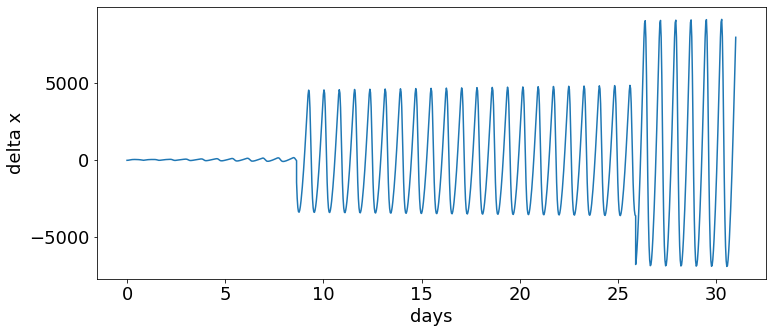

In [7]:
plt.figure(figsize=(12, 5))
plt.ylabel('delta x')
plt.xlabel('days')
plt.plot((pd.to_datetime(m_data['epoch']).astype(int) -
         pd.to_datetime(m_data['epoch']).astype(int)[0])/ day, m_data['x']-m_data['x_sim'])

посмотрим на предсказанные и верные значения в момент разладки

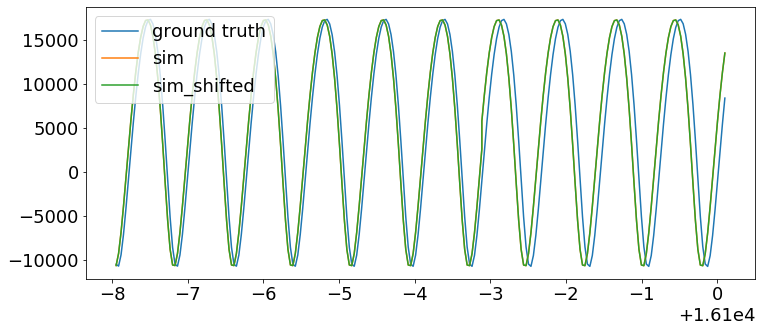

In [8]:
begin = 650
end = 900
shift=24  # period = 24 measurements, so np.allclose(sim, sim_shifted)
plt.figure(figsize=(12, 5))
plt.plot(pd.to_datetime(m_data['epoch']).astype(int)[begin:end] / day, m_data['x'][begin:end], label='ground truth')
plt.plot(pd.to_datetime(m_data['epoch']).astype(int)[begin:end] / day, m_data['x_sim'][begin:end], label='sim')
plt.plot(pd.to_datetime(m_data['epoch']).astype(int)[begin:end] / day, m_data['x_sim'][begin+shift:end+shift],
         label='sim_shifted')
plt.legend(loc=2)

Раз на графике выше желтый и зеленый графики практически совпали, значит, симуляция продолжила выдавать периодические прогнозы.

А фаза ground truth резко изменилась